Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



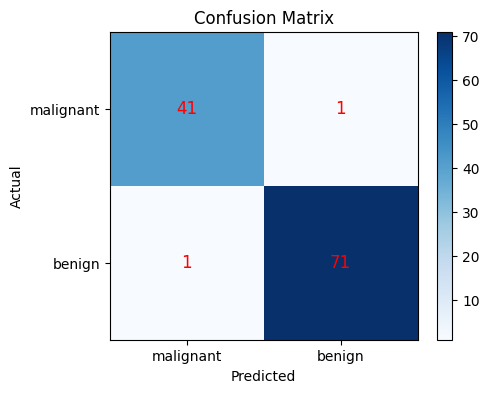

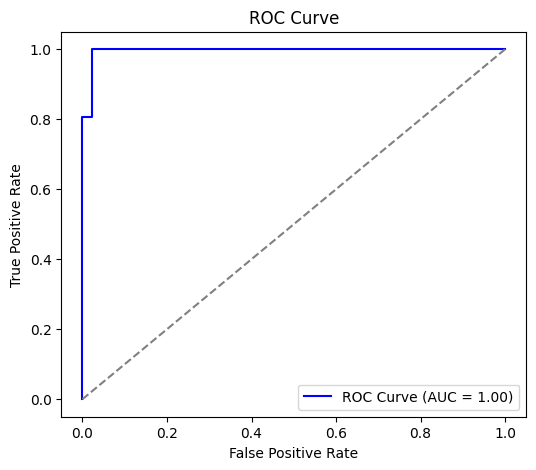


With threshold = 0.3
Precision: 0.972972972972973
Recall: 1.0


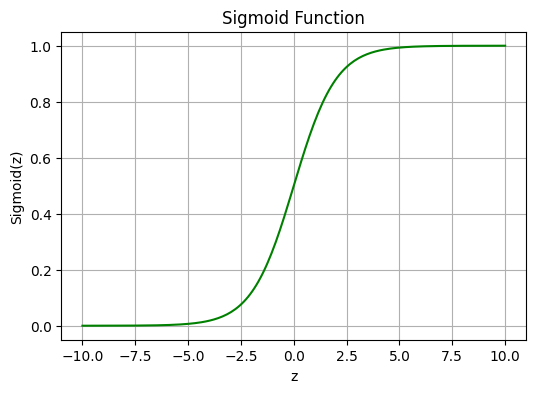

In [7]:
# Task 4: Classification with Logistic Regression
# Objective: Build a binary classifier using logistic regression
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
confusion_matrix, classification_report, accuracy_score,
roc_curve, auc, precision_score, recall_score
)
# Step 2: Load dataset (Breast Cancer Wisconsin)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)
# Step 4: Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)
# Step 6: Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1] # probability for positive class
# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], data.target_names)
plt.yticks([0,1], data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add numbers inside confusion matrix
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(j, i, cm[i,j], ha="center", va="center", color="red", fontsize=12)
plt.show()
# Step 8: ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
# Step 9: Threshold tuning
threshold = 0.3 # Example threshold
y_pred_new = (y_prob >= threshold).astype(int)
print(f"\nWith threshold = {threshold}")
print("Precision:", precision_score(y_test, y_pred_new))
print("Recall:", recall_score(y_test, y_pred_new))
# Step 10: Sigmoid function visualization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-10, 10, 200)
plt.figure(figsize=(6,4))
plt.plot(z, sigmoid(z), color="green")
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()